In [93]:
# Örnek:
from IPython.display import Image
from IPython.core.display import HTML 

<font size=4 color='orange'> Taylor Serisi Yöntemi

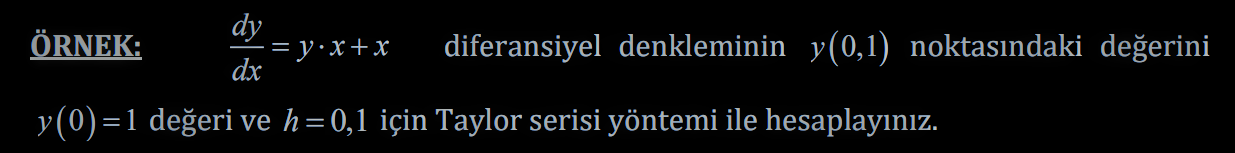

In [8]:
Image("dd taylor.png")

In [3]:
%reset -f
import sympy as sp
import pandas as pd
from numpy import transpose as tr

In [4]:
'''giriş'''
# verilen fonksiyon dy/dx
x,y = sp.symbols('x y')
Dy  = (y + x)/x
# verilen x0 ve y0 değerleri:: y0(x0)
v   = [1,0.5]
# h değeri
dx  = 0.1
# istenen y' için verilen x1 değeri:: y1(x1)
x1  = 1.5

In [7]:
# adım sayısı
s=int((x1-v[0])/dx)
# kontrol:
print('adım sayısı: ',s)
# x değerleri
X=[v[0]]
for i in range(1,s): X.append(round(X[i-1]+dx,3))
X.append(x1)
print('X=',X)
# 2. ve 3. türevler
D2y=sp.diff(Dy,x)
D3y=sp.diff(Dy,x,2)
sp.diff(Dy,x)

adım sayısı:  5
X= [1, 1.1, 1.2, 1.3, 1.4, 1.5]


1/x - (x + y)/x**2

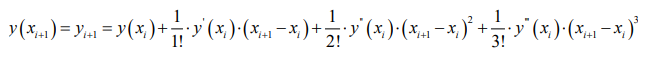

In [94]:
Image('taylor dd frm.png')

In [8]:
'kaçıncı dereceye kadar? burada 3. dereceye gidildi. soruya dikkat et belirtilmemişse 2 yi de dene'
d=2
# y serisi
Y=[v[1]]
# 1. - 2. - 3. türevlerin değerleri

for i in range(len(X)-1):
    Y.append(round
             ( 
              Y[i] + 
              dx*Dy.subs({x:X[i],y:Y[i]}).evalf() + 
              (1/2)*D2y.subs({x:X[i],y:Y[i]}).evalf()*dx**2 + 
              (1/6)*D3y.subs({x:X[i],y:Y[i]}).evalf()*dx**3
              ,3
             )
            )
pd.DataFrame(tr([X,Y]),columns=['x','y']).style.set_precision(3)

,x,y
0,1,0.500
1,1.100,0.648
2,1.200,0.804
3,1.300,0.968
4,1.400,1.140
5,1.500,1.319


In [5]:
'''gerçek değer'''
import sympy as sp
# gerçek sonuç
y    = sp.Function('y')(x)
Dy   =  y.diff(x)
expr = sp.Eq(Dy, (y + x)/x)
sol  = sp.dsolve(expr, ics={y.subs({x:v[0]}): v[1]})

sp.Matrix([expr,sol])

Matrix([
[Eq(Derivative(y(x), x), (x + y(x))/x)],
[           Eq(y(x), x*(log(x) + 0.5))]])

In [36]:
sol.subs({x:x1}).rhs.round(3)

1.358

<font size=4 color='orange'>Euler, Heun (Glşt. Euler) ve Orta Nokta Yöntemleri

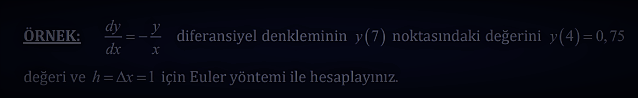

In [28]:
Image("euler.png")

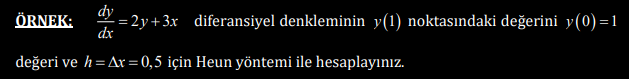

In [188]:
Image("heun.png")

In [28]:
%reset -f
import math
from numpy import transpose as tr

In [29]:
'''giriş'''
# verilen fonksiyon dy/dx
def Dy(x,y): return 2*y+3*x
# verilen x0 ve y0 değerleri:: y0(x0)
v  = [0,1]
# h değeri
dx = .5
# istenen y' için verilen x1 değeri:: y1(x1)
sx = 1
# yöntem euler: 'elr' // heun: 'hun' // ortanokta: 'ort'
ynt='ort'

In [30]:
X=[]
X.clear()
X.append(v[0])
n=int((sx-v[0])/dx)
for i in range(1,n): X.append(round(X[i-1]+dx,3))
X.append(sx)
print('X=',X)

X= [0, 0.5, 1]


In [31]:
y=[]
y.clear()
y.append(v[1])

hun=[]
hun.clear()
hun.append(v[1])

for i in range(len(X)-1):
    if ynt=='hun':        
        y.append(round( hun[i] + dx*Dy(X[i],hun[i]),3))
        hun.append(round( hun[i] + ( Dy(X[i],hun[i]) + Dy(X[i+1],y[i+1]))*(dx/2),3))
    elif ynt=='ort':
        ym = y[i] + Dy(X[i],y[i])*dx/2
        xm = X[i] + dx/2
        y.append(y[i] + dx*Dy(xm,ym))
    else: y.append(y[i] + dx*Dy(X[i],y[i]))    
#print('Euler Y = ',elr,'\nHeun Y = ',hun)  

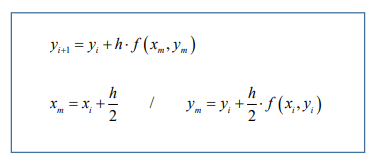

In [10]:
 Image("ortnok.png")

In [32]:
'''sonuç'''
if ynt=='hun': print('euler: ',y[-1],'\theun: ',hun[-1])
elif ynt=='ort': print('ort: ',y[-1])
else: print('euler: ',y[-1])  

ort:  8.6875


In [34]:
'''Sonucu aldın, gerekmedikçe ileri gitme!'''

'Sonucu aldın, gerekmedikçe ileri gitme!'

In [26]:
import pandas as pd
pd.DataFrame(tr([X,y]),columns=['x','ort_y']).style.hide_index().set_precision(3)

x,ort_y
0.000,1.000
0.500,2.875
1.000,8.688


In [7]:
'''gerçek değer'''
import sympy as sp
# gerçek sonuç
u   = sp.symbols('u')
f   = sp.Function('f')
f_  = sp.Derivative(f(u), u)
eq  = sp.Eq(f_, Dy(u,f(u)))
res = sp.dsolve(eq, f(u), ics={f(v[0]):v[1]}).subs({u:sx})
res.evalf()

Eq(f(1), 10.6808481731286)

<font size=4 color='orange'>Runge-Kutta Yöntemi